In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/Phishing_Legitimate_full.csv')
df1 = pd.read_csv('datasets/phishing_site_urls.csv')
df2 = pd.read_csv('datasets/Website Phishing.csv')

In [3]:
df.head(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [4]:
df.drop(['id'], axis=1, inplace=True)

In [5]:
df.isnull().sum()

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

In [7]:
# cm = df.corr().round(2)
# plt.figure(figsize=(90,70))
# sns.heatmap(cm, annot=True, cmap='coolwarm')

In [8]:
df.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

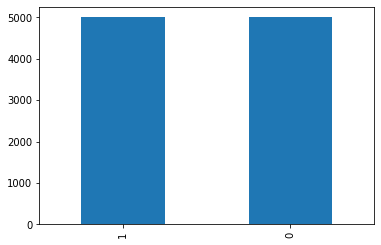

In [9]:
# data is balanced
df['CLASS_LABEL'].value_counts().plot(kind='bar')

In [10]:
def corr_heatmap(data, idxs, idxe):
    y = df['CLASS_LABEL']
    temp = df.iloc[:, idxs:idxe]
    temp['CLASS_LABEL'] = y
    sns.heatmap(temp.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.show()

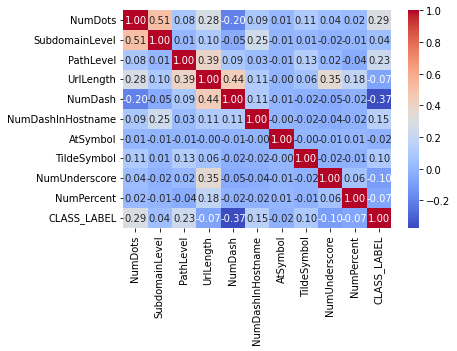

In [11]:
corr_heatmap(df, 0, 10)

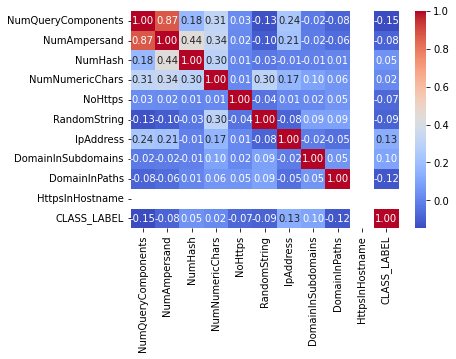

In [12]:
corr_heatmap(df, 10, 20)

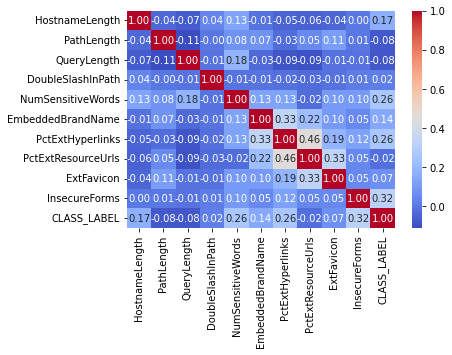

In [13]:
corr_heatmap(df, 20, 30)

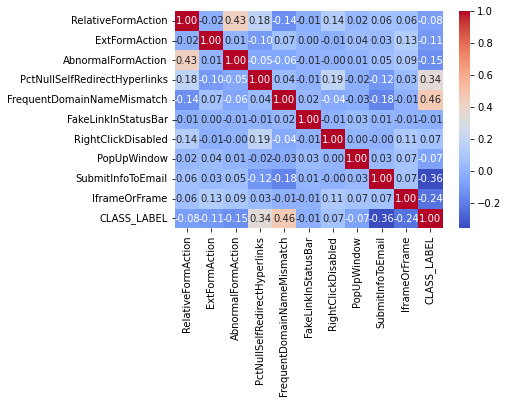

In [14]:
corr_heatmap(df, 30, 40)

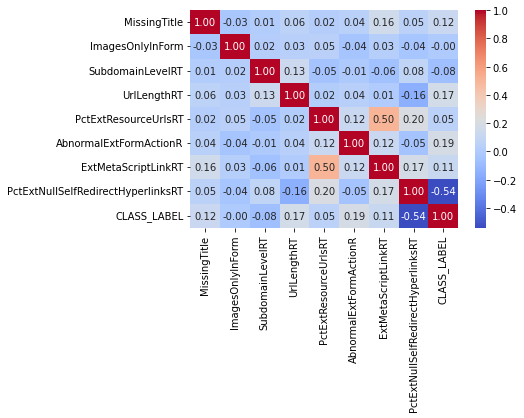

In [15]:
corr_heatmap(df, 40, 50)

In [16]:
from sklearn.feature_selection import mutual_info_classif
X = df.drop(['CLASS_LABEL'], axis=1)
y = df['CLASS_LABEL']
dis_features = X.dtypes == int

scores = mutual_info_classif(X, y, discrete_features=dis_features)
scores = pd.Series(scores, index=X.columns)
scores.sort_values(ascending=False)
scores

NumDots                               6.553700e-02
SubdomainLevel                        6.392610e-03
PathLevel                             5.543887e-02
UrlLength                             5.263855e-02
NumDash                               1.140136e-01
NumDashInHostname                     1.502933e-02
AtSymbol                              2.079892e-04
TildeSymbol                           5.362924e-03
NumUnderscore                         1.037366e-02
NumPercent                            3.790407e-03
NumQueryComponents                    3.361768e-02
NumAmpersand                          1.962894e-02
NumHash                               1.596890e-03
NumNumericChars                       1.326711e-01
NoHttps                               2.854909e-03
RandomString                          3.643235e-03
IpAddress                             1.207265e-02
DomainInSubdomains                    5.497419e-03
DomainInPaths                         7.003483e-03
HttpsInHostname                

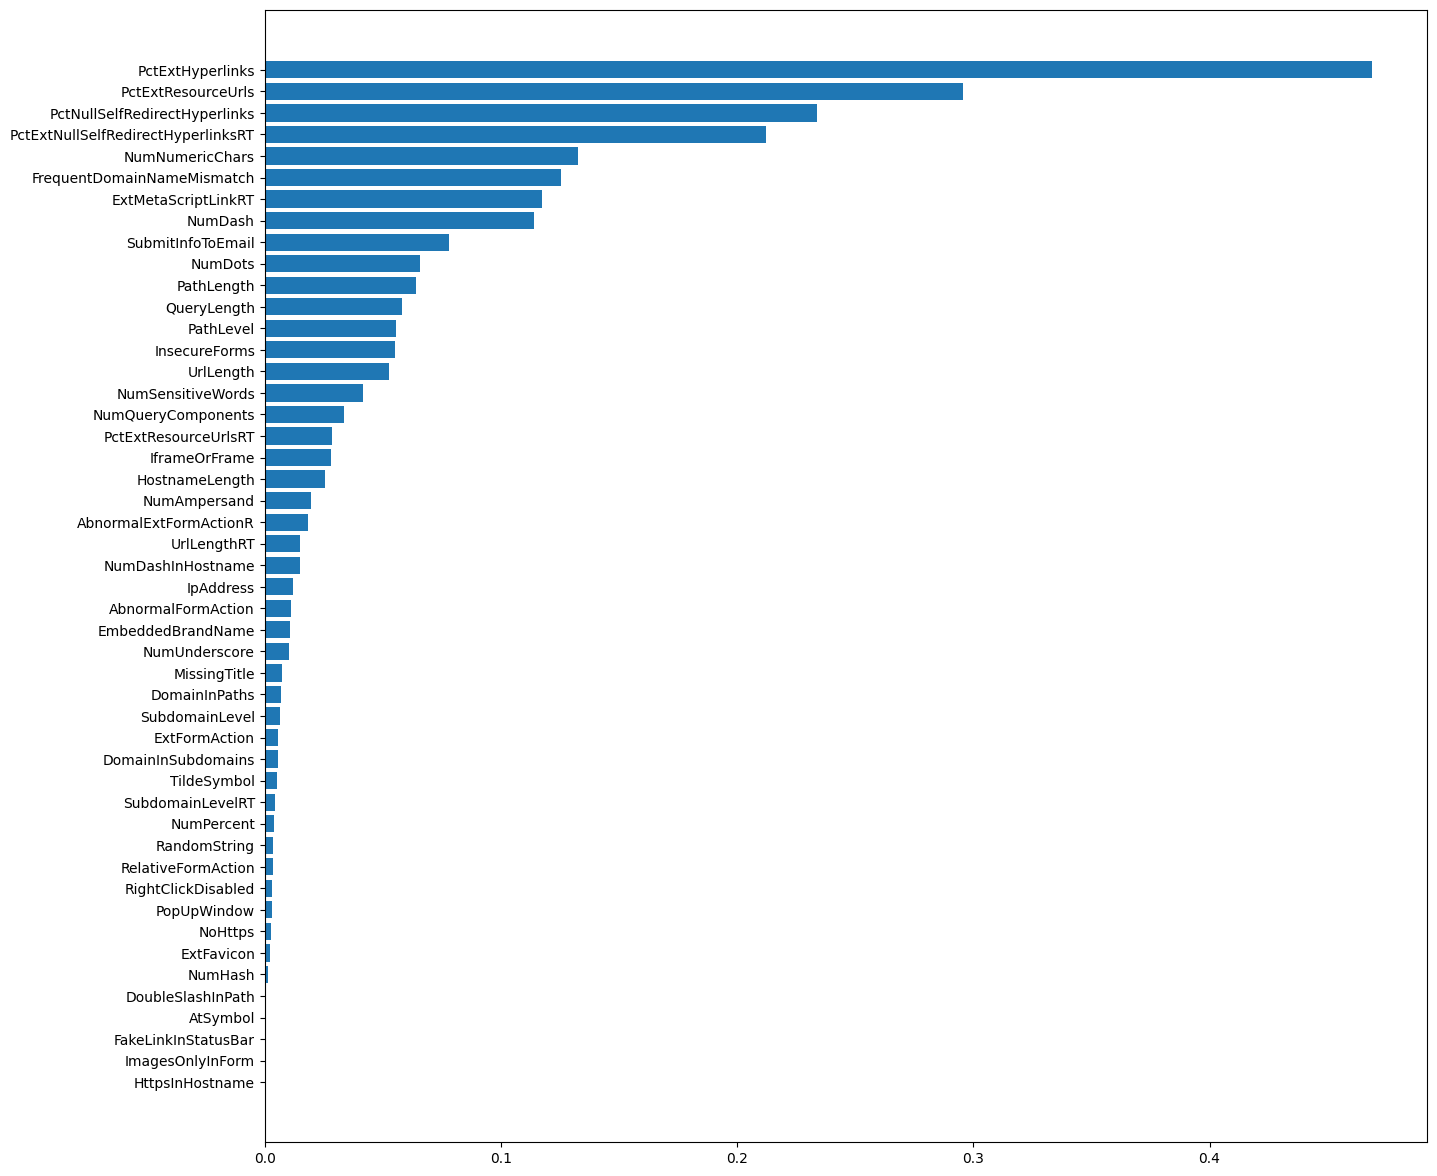

In [18]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = scores.index
    plt.barh(width, scores)
    plt.yticks(width, ticks)
plt.figure(dpi=100, figsize=(15,15))
plot_mi_scores(scores)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
def train_logistic(df, top_n):
    top_n_features = scores.sort_values(ascending=False)[:top_n].index.tolist()
    X = df[top_n_features]
    y = df['CLASS_LABEL']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)

    ypred = lr.predict(X_test)

    accuracy = accuracy_score(y_test, ypred)
    precision = precision_score(y_test, ypred)
    recall = recall_score(y_test, ypred)
    f1 = f1_score(y_test, ypred)
    return accuracy, precision, recall, f1

In [26]:
arr = []
for i in range(20, 51):
    accuracy, precision, recall, f1 = train_logistic(df, i)
    arr.append([i, accuracy, precision, recall, f1])
    print("Performance for Logistic Regression with top %d features is accuracy: %.2f, precision: %.2f, recall: %.2f, f1 score: %.2f" % (i, accuracy, precision, recall, f1))

Performance for Logistic Regression with top 20 features is accuracy: 0.92, precision: 0.91, recall: 0.94, f1 score: 0.92
Performance for Logistic Regression with top 21 features is accuracy: 0.92, precision: 0.91, recall: 0.94, f1 score: 0.92
Performance for Logistic Regression with top 22 features is accuracy: 0.92, precision: 0.91, recall: 0.93, f1 score: 0.92
Performance for Logistic Regression with top 23 features is accuracy: 0.92, precision: 0.92, recall: 0.94, f1 score: 0.93
Performance for Logistic Regression with top 24 features is accuracy: 0.92, precision: 0.91, recall: 0.94, f1 score: 0.93
Performance for Logistic Regression with top 25 features is accuracy: 0.92, precision: 0.92, recall: 0.94, f1 score: 0.93
Performance for Logistic Regression with top 26 features is accuracy: 0.93, precision: 0.92, recall: 0.94, f1 score: 0.93
Performance for Logistic Regression with top 27 features is accuracy: 0.92, precision: 0.92, recall: 0.94, f1 score: 0.93
Performance for Logistic

In [27]:
df = pd.DataFrame(arr, columns=['top_n', 'accuracy', 'precision', 'recall', 'f1'])
df

,top_n,accuracy,precision,recall,f1
0,20,0.9228,0.910906,0.939034,0.924756
1,21,0.9224,0.913380,0.935075,0.924100
2,22,0.9208,0.912471,0.932700,0.922475
3,23,0.9248,0.915058,0.938242,0.926505
4,24,0.9244,0.914992,0.937451,0.926085
5,25,0.9248,0.915058,0.938242,0.926505
6,26,0.9256,0.916473,0.938242,0.927230
7,27,0.9248,0.915058,0.938242,0.926505
8,28,0.9268,0.917311,0.939826,0.928432
9,29,0.9260,0.916538,0.939034,0.927650


<AxesSubplot:xlabel='top_n', ylabel='accuracy'>

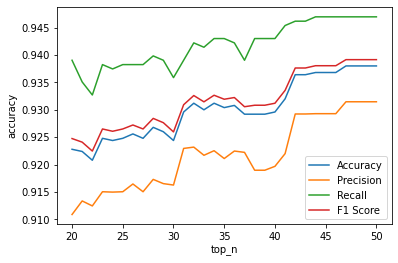

In [29]:
sns.lineplot(x='top_n', y='accuracy', data=df, label='Accuracy')
sns.lineplot(x='top_n', y='precision', data=df, label='Precision')
sns.lineplot(x='top_n', y='recall', data=df, label='Recall')
sns.lineplot(x='top_n', y='f1', data=df, label='F1 Score')